In [35]:
%matplotlib inline

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

plt.style.use("ggplot")

In [36]:
dataset = pd.read_csv("student-mat.csv", sep=";")
data = dataset[["G1", "G2", "G3", "studytime", "failures", "absences"]]
predict = "G3"

In [37]:
X = np.array(data.drop([predict], 1))   # Attributes
y = np.array(data[predict])             # Labels

# Split dataset in 4 arrays & test on 10% of the data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

C:\Users\lars29i0\AppData\Local\Temp/ipykernel_14676/1843668013.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop([predict], 1))   # Attributes


In [38]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
accuracy = linear.score(x_test, y_test)  # Accuracy of model

print(f"Model Accuracy:     {round(accuracy * 100, 2)}%")

Model Accuracy:     70.92%


In [39]:
best = 0

for _ in range(100):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3)
    training_model = linear_model.LinearRegression()
    training_model.fit(x_train, y_train)
    accuracy = linear.score(x_test, y_test)
    if accuracy > best:
        best = accuracy

predictions = training_model.predict(x_test)
for i in range(10):
    print(f"Prediction: {int(predictions[i])} \t Actual: {y_test[i]}")
print(f"Best accuracy: {round((best * 100), 2)}%")

Prediction: -1 	 Actual: 0
Prediction: 15 	 Actual: 15
Prediction: 8 	 Actual: 8
Prediction: 13 	 Actual: 13
Prediction: 8 	 Actual: 9
Prediction: 18 	 Actual: 18
Prediction: 16 	 Actual: 17
Prediction: 13 	 Actual: 15
Prediction: 8 	 Actual: 10
Prediction: 14 	 Actual: 15
Best accuracy: 91.12%


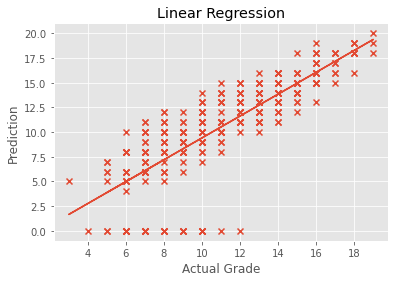

In [40]:
_X, _y = data["G1"], data["G3"]
m, b = np.polyfit(data["G1"], data["G3"], 1)

plt.title("Linear Regression")
plt.xlabel("Actual Grade")
plt.ylabel("Prediction")
plt.scatter(_X, _y, marker="x")
plt.plot(_X, m * _X + b)